### Predicting Student Score based on Study Hours

In [1]:
# importing libraries
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

## Load the data from the CSV file

In [2]:
# Load the data into a pandas DataFrame
student_data = pd.read_csv("./student_scores.csv")
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check data for missing values
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
# Check data for duplicate values
student_data.duplicated().sum()

0

In [5]:
## Separate the data into training and test data
from sklearn.model_selection import train_test_split
X = student_data["Hours"]
y = student_data["Scores"]

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

X_train.size, y_train.size

(20, 20)

In [6]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
study_mod_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
study_mod_1.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
study_mod_1.fit(X_train, y_train, epochs=50, verbose=0)

In [7]:
# Evaluate the model
y_preds_1 = study_mod_1.predict(X_test)

1/1 [==============================] - 0s 64ms/step


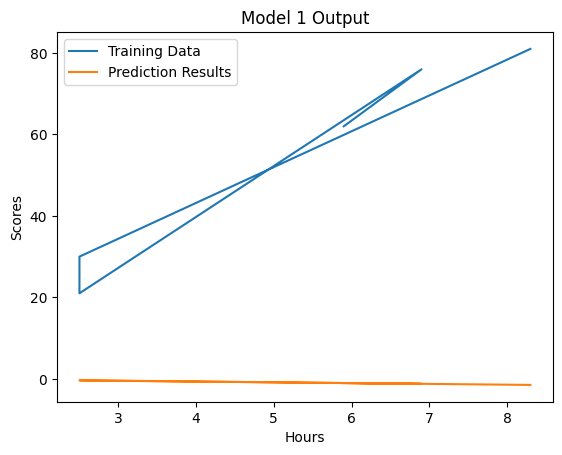

In [8]:
# Visualize the model's predictions
plt.plot(X_test, y_test)

plt.plot(X_test, y_preds_1)

plt.xlabel("Hours")
plt.ylabel("Scores")

plt.legend(["Training Data", "Prediction Results"])
plt.title("Model 1 Output")
plt.savefig("Model 1 Output.png")
plt.show()

In [9]:
# High loss, increase the number of nodes
# 1. Set the random seed
study_mod_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
study_mod_2.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
study_mod_2.fit(X_train, y_train, epochs=50, verbose=0)

In [10]:
# Evaluate the model
y_preds_2 = study_mod_2.predict(X_test)

1/1 [==============================] - 0s 37ms/step


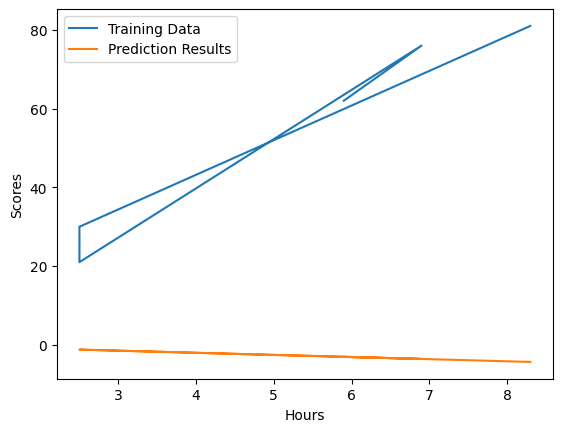

In [11]:
# Visualize the model's accuracy
plt.plot(X_test, y_test)

plt.plot(X_test, y_preds_2)

plt.xlabel("Hours")
plt.ylabel("Scores")

plt.legend(["Training Data", "Prediction Results"])

In [12]:
# Set the RELU activation function and increase the number of epochs
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
study_mod_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
study_mod_3.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
study_mod_3.fit(X_train, y_train, epochs=100, verbose=0)

In [13]:
# Evaluate the model
y_preds_3 = study_mod_3.predict(X_test)

1/1 [==============================] - 0s 39ms/step


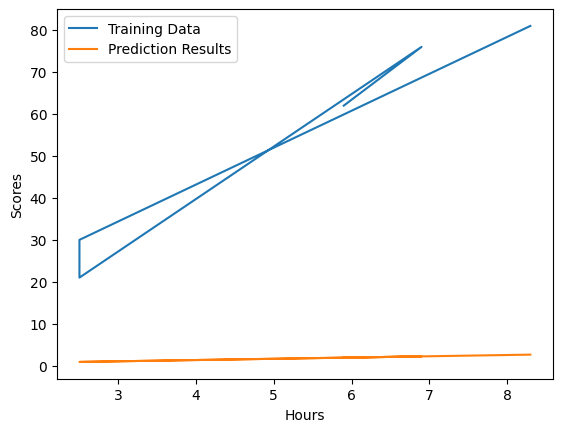

In [14]:
# Visualize the predictions
plt.plot(X_test, y_test)

plt.plot(X_test, y_preds_3)

plt.xlabel("Hours")
plt.ylabel("Scores")

plt.legend(["Training Data", "Prediction Results"])

In [15]:
# Increase the learning rate
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
study_mod_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
study_mod_4.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                    metrics=["mae"])

# 3. Fit the model
study_mod_4.fit(X_train, y_train, epochs=100, verbose=0)

In [16]:
# Evaluate the model
y_preds_4 = study_mod_4.predict(X_test)

1/1 [==============================] - 0s 38ms/step


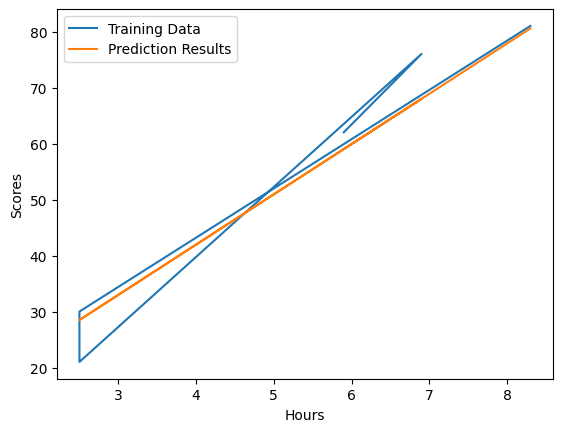

In [17]:
# Visualize the predictions' accuracy
plt.plot(X_test, y_test)

plt.plot(X_test, y_preds_4)

plt.xlabel("Hours")

plt.ylabel("Scores")

plt.legend(["Training Data", "Prediction Results"])

In [18]:
## The model has significantly improved but we need to tweak it further
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
study_mod_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
study_mod_5.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                    metrics=["mae"])

# 3. Fit the model
study_mod_5.fit(X_train, y_train, epochs=100, verbose=0)

In [19]:
y_preds_5 = study_mod_5.predict(X_test)
y_preds_5

1/1 [==============================] - 0s 43ms/step


array([[83.229614],
       [29.520702],
       [29.520702],
       [70.265396],
       [61.00523 ]], dtype=float32)

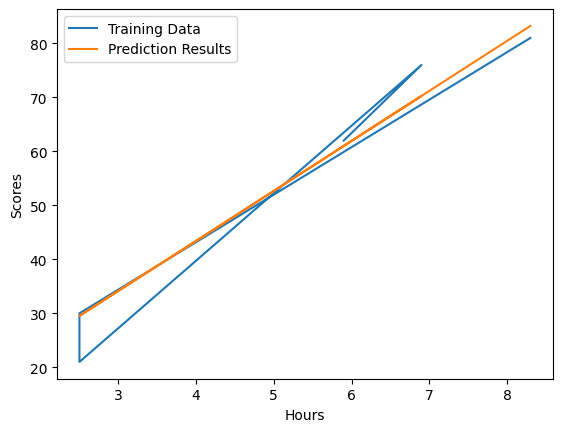

In [20]:
# Plot the test data
plt.plot(X_test, y_test)

# Plot the prediction results
plt.plot(X_test, y_preds_5)

plt.xlabel("Hours")

plt.ylabel("Scores")

plt.legend(["Training Data", "Prediction Results"])

In [21]:
# Try with a model with more nodes
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
study_mod_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
study_mod_6.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                    metrics=["mae"])

# 3. Fit the model
study_mod_6.fit(X_train, y_train, epochs=100, verbose=0)

In [22]:
y_preds_6 = study_mod_6.predict(X_test)

1/1 [==============================] - 0s 43ms/step


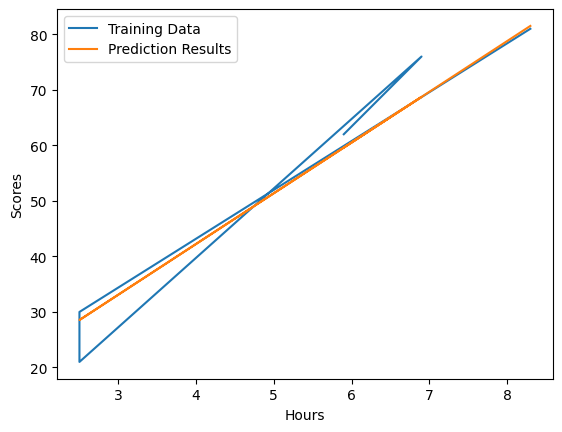

In [23]:
# Plot the training and the prediction data against the X values
plt.plot(X_test, y_test)
plt.plot(X_test, y_preds_6)

plt.xlabel("Hours")
plt.ylabel("Scores")

plt.legend(["Training Data", "Prediction Results"])

In [38]:
# Predict the performance for 9.25 study hours
predict = study_mod_6.predict(tf.constant([[9.25,]]))
predict

1/1 [==============================] - 0s 25ms/step


array([[90.18766]], dtype=float32)